In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.optimize as optim

In [57]:
test = pd.read_csv('./cells1.csv')

In [68]:
capacity = test['capacity'][test['cell']==16]
capacity = capacity.reset_index(drop=True)
cycles = test['cycles'][test['cell']==16]
cycles = cycles.reset_index(drop=True)

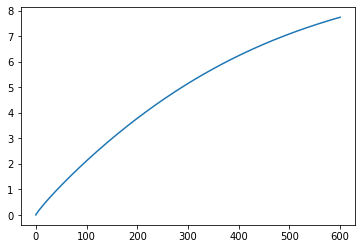

In [69]:
plt.plot(cycles,capacity)
plt.show()

In [70]:
def sre(abm,cycles):
    a = abs(abm[0])
    b = abm[1]
    m = abm[2]
    return (2*m)*((0.5)-(1/(1+np.exp((a*cycles)**b))))

In [71]:
def sre_fit(parm,capacity,cycles):
    pred_val = sre(parm,cycles)
    result = np.sqrt(np.mean((capacity-pred_val)**2))
    return result

In [72]:
parm = np.c_[0.2,0.3,max(capacity)][0]

In [73]:
sre(parm,cycles)

0      0.000000
1      2.657433
2      3.447791
3      3.895838
4      4.213632
         ...   
219    7.506350
220    7.507660
221    7.508958
222    7.510246
223    7.511522
Name: cycles, Length: 224, dtype: float64

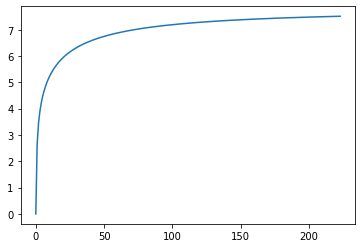

In [74]:
plt.plot(sre(parm,cycles))
plt.show()

In [76]:
fit = optim.minimize(fun=sre_fit,x0=parm,args=(capacity,cycles),method='L-BFGS-B')

In [77]:
fit

      fun: 3.7109376869298755e-05
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([-1.98528080e+01,  1.30834118e-01, -6.90822396e-03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 348
      nit: 41
     njev: 87
   status: 0
  success: True
        x: array([4.04772795e-03, 8.92860055e-01, 9.64986218e+00])

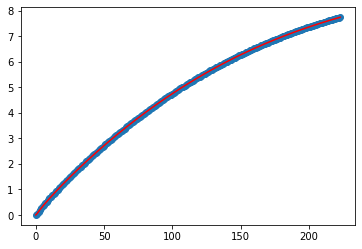

In [86]:
plt.scatter(x=range(len(capacity)),y = capacity)
plt.plot(sre(fit.x,cycles),'r')